# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_list = []
clouds = []
country = []
date = []
humidity = []
lat = []
lon = []
temp_max = []
wind = []


from api_keys import weather_api_key

start_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q="

print("<____Data Retrieval Start____>")



for city in cities:
    time.sleep(1) 
    url = start_url + city
    response = requests.get(url).json()
   
    try:
        if response["message"] == "city not found":
            print("City not found. Skipping...")
            
    except:
        print("Processing City: " + city)
        cities_list.append(city)
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])

    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

<____Data Retrieval Start____>
Processing City: souillac
City not found. Skipping...
Processing City: qaanaaq
City not found. Skipping...
Processing City: torbay
Processing City: rikitea
Processing City: upernavik
City not found. Skipping...
Processing City: marawi
Processing City: zemio
Processing City: busselton
Processing City: marzuq
Processing City: albany
City not found. Skipping...
Processing City: poum
Processing City: puerto ayora
Processing City: carnarvon
City not found. Skipping...
Processing City: east london
Processing City: ribeira grande
Processing City: shentala
Processing City: bonavista
Processing City: port alfred
Processing City: avarua
Processing City: lasa
Processing City: mar del plata
Processing City: saint george
Processing City: lazaro cardenas
Processing City: kodinsk
Processing City: kapaa
Processing City: arraial do cabo
Processing City: havre-saint-pierre
Processing City: changji
Processing City: the valley
Processing City: abis
Processing City: saskylakh

City not found. Skipping...
Processing City: cap malheureux
Processing City: lodja
Processing City: yerbogachen
Processing City: nizhniy kuranakh
Processing City: mwingi
Processing City: sitamau
Processing City: chiriguana
Processing City: willowmore
Processing City: carutapera
Processing City: ulladulla
City not found. Skipping...
Processing City: broome
Processing City: galich
Processing City: ossora
Processing City: vila velha
Processing City: guacimo
Processing City: beitbridge
Processing City: okhotsk
Processing City: hillsborough
Processing City: santa rosa
Processing City: awjilah
Processing City: ouadda
Processing City: nanga eboko
Processing City: sao joao da barra
Processing City: guerrero negro
Processing City: la asuncion
Processing City: kavieng
Processing City: sistranda
Processing City: oussouye
Processing City: gidam
Processing City: kleive
Processing City: terrace
City not found. Skipping...
Processing City: shenjiamen
Processing City: two rivers
Processing City: vanim

Processing City: florida
Processing City: lagoa
Processing City: olkhovka
Processing City: sangmelima
Processing City: merrill
Processing City: karla
Processing City: zhurivka
Processing City: lima
Processing City: kaeo
Processing City: hounde
Processing City: makakilo city
Processing City: luoyang
Processing City: kosh-agach
Processing City: lorengau
Processing City: sabla
Processing City: russell
City not found. Skipping...
Processing City: grenfell
Processing City: viedma
Processing City: komsomolskiy
City not found. Skipping...
Processing City: quesnel
Processing City: obo
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": cities_list,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity": humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp": temp_max,
    "Wind Speed":wind
}
# Create a data frame from dictionary
weather_data_pd = pd.DataFrame(weatherpy_dict)
weather_data_pd.count()
# Save data frame to CSV
weather_data_pd.to_csv('../output_data/weather_data.csv')
# # Display data frame head
weather_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,75,MU,1614828870,94,-20.5167,57.5167,75.20,2.30
1,qaanaaq,64,GL,1614828872,75,77.4840,-69.3632,-21.80,9.13
2,torbay,90,CA,1614828624,93,47.6666,-52.7314,24.01,21.85
3,rikitea,83,PF,1614828774,80,-23.1203,-134.9692,80.15,8.37
4,upernavik,100,GL,1614828876,79,72.7868,-56.1549,-8.36,18.37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

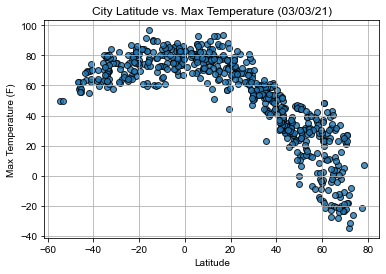

In [19]:
# Build scatter plot for latitude vs temperature
plt.scatter(weather_data_pd["Lat"], 
            weather_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

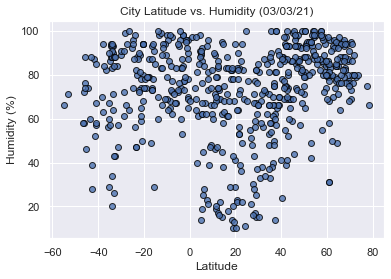

In [20]:
# Build the scatter plots for each city types
plt.scatter(weather_data_pd["Lat"], 
            weather_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

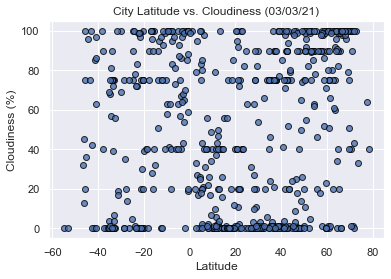

In [21]:
plt.scatter(weather_data_pd["Lat"], 
            weather_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

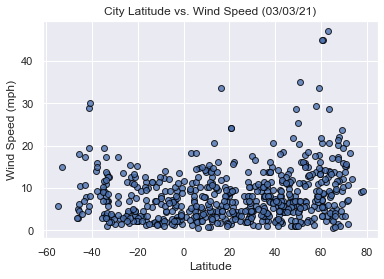

In [23]:
# Build the scatter plots for each city types
plt.scatter(weather_data_pd["Lat"], 
            weather_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

In [39]:
 #linear regression by hemisphere

#create northern and southern df
north_hemi_df = weather_data_pd.loc[(weather_data_pd['Lat']>0)]
south_hemi_df = weather_data_pd.loc[(weather_data_pd['Lat'] < 0)]

In [40]:
north_hemi_df.count()

City          422
Cloudiness    422
Country       422
Date          422
Humidity      422
Lat           422
Lng           422
Max Temp      422
Wind Speed    422
dtype: int64

In [43]:
south_hemi_df.count()

City          178
Cloudiness    178
Country       178
Date          178
Humidity      178
Lat           178
Lng           178
Max Temp      178
Wind Speed    178
dtype: int64

In [41]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8921260137490372


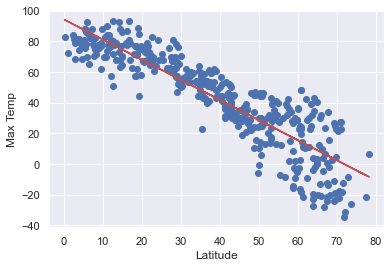

<Figure size 432x288 with 0 Axes>

In [42]:
 #Northern Hemisphere - Temperature (F) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("NH_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.552694285902268


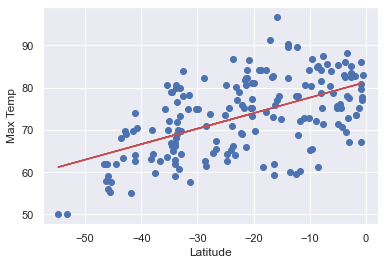

<Figure size 432x288 with 0 Axes>

In [44]:
x = south_hemi_df['Lat']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("SH_temp_vs_lat.png")

The r-value is: 0.6082708688906918


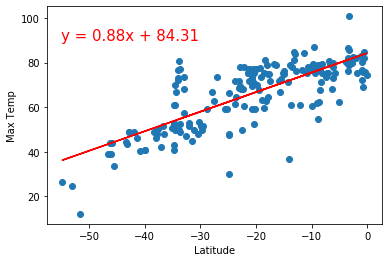

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.3910852903512756


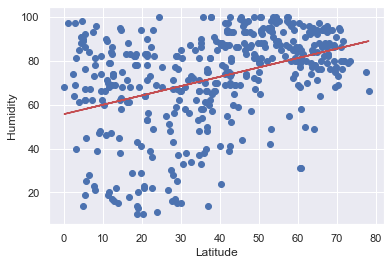

<Figure size 432x288 with 0 Axes>

In [45]:
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.26681435034810613


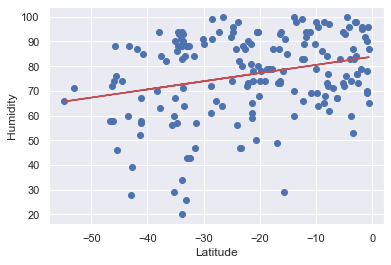

<Figure size 432x288 with 0 Axes>

In [46]:
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("SH_hum_vs_lat.png")

The r-value is: 0.014985174297345524


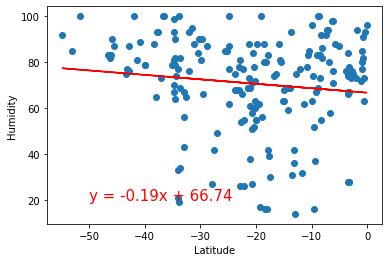

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.4064770444521326


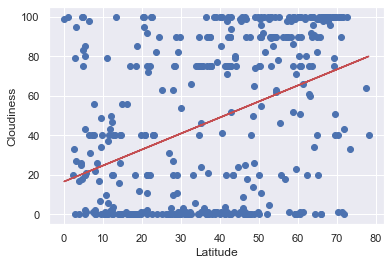

<Figure size 432x288 with 0 Axes>

In [47]:
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

The r-value is: 0.0020898727664228514


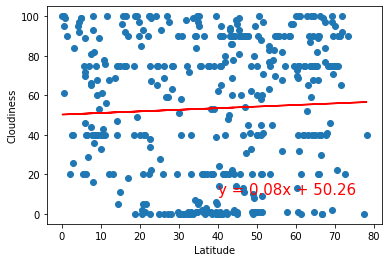

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.340237457685716


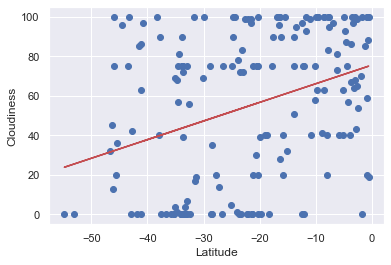

<Figure size 432x288 with 0 Axes>

In [48]:
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("SH_cloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.21929212511705354


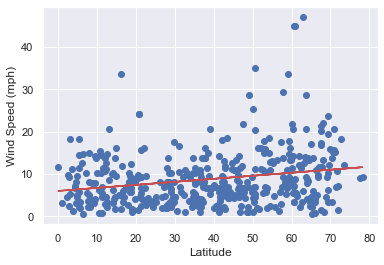

<Figure size 432x288 with 0 Axes>

In [49]:
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("NH_wind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.2839126700493309


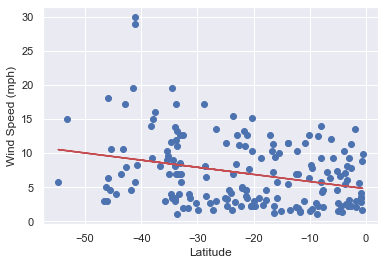

<Figure size 432x288 with 0 Axes>

In [50]:
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("SH_wind_vs_lat.png")